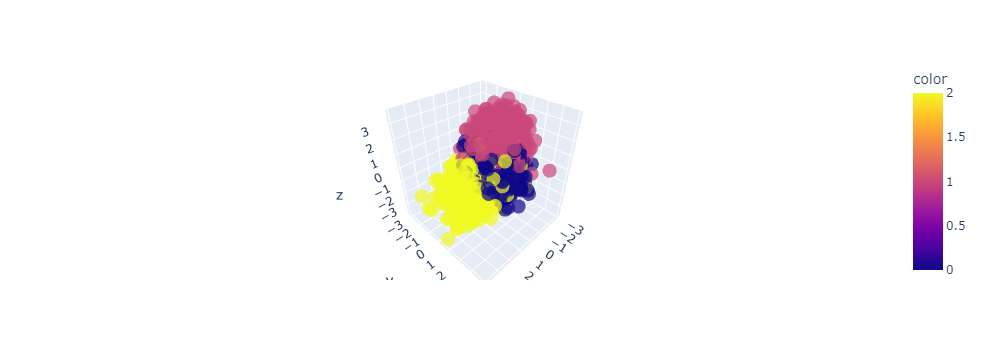

In [14]:

import numpy as np
import plotly.express as px #3d plot akar jonno
from sklearn.datasets import make_classification

X, y = make_classification(
    n_features = 6,
    n_classes = 3, #class 3 ta
    n_samples = 2000,
    n_informative = 2,
    random_state = 5,
    n_clusters_per_class = 1,
)

fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], color=y, opacity=0.7)
fig.show()

<h4>PCA</h4> plotly te 6d cilo .pca te 2d korlam

In [15]:


from sklearn.decomposition import PCA

pca = PCA(n_components=2) #2ta class
X_pca = pca.fit_transform(X)

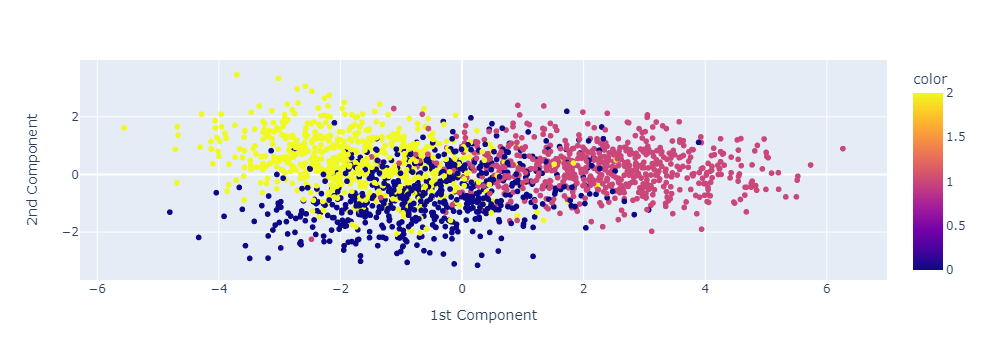

In [16]:
fig  = px.scatter(x = X_pca[:, 0], y = X_pca[:, 1], color=y)

fig.update_layout(
    xaxis_title = "1st Component",
    yaxis_title = "2nd Component",
)
fig.show()

<h4>t-SNE</h4> pca er caya valo dakha jacce

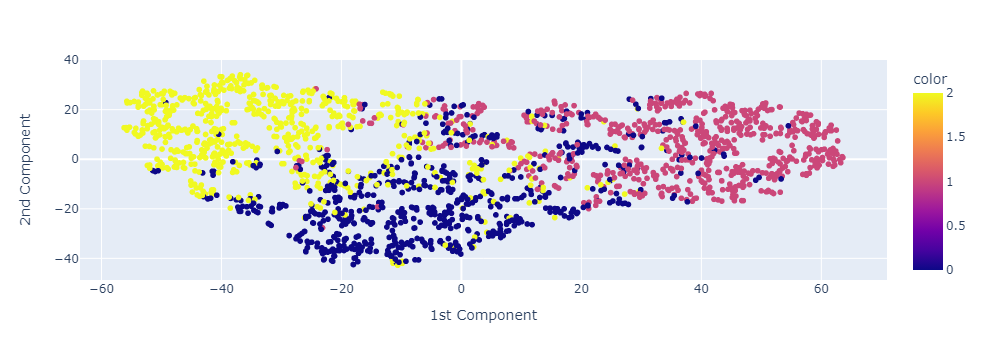

In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

fig  = px.scatter(x = X_tsne[:, 0], y = X_tsne[:, 1], color=y)

fig.update_layout(
    xaxis_title = "1st Component",
    yaxis_title = "2nd Component",
)
fig.show()

In [18]:
tsne.kl_divergence_  # Kullback-Leibour (KL) divergence .ata joto coto asbe toto valo

1.1992464065551758

<h4> IRIS Data set a dekbo PCA,t-SNE kamon kaj kore</h4>

In [19]:
import pandas as pd
df = pd.read_csv("dataset/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
df.shape

(150, 5)

<h4> PCA</h4>

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop("species", axis=1)
y = df["species"]

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, random_state=13, test_size=0.25, shuffle=True)

pca = PCA(2)
X_train_pca = pca.fit_transform(X_train)

pca.score(X_test)

-3.8395100315783126

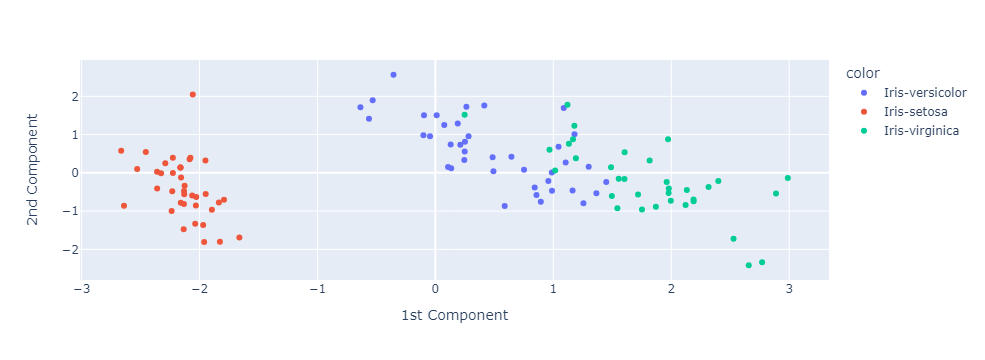

In [21]:
fig  = px.scatter(x = X_train_pca[:, 0], y = X_train_pca[:, 1], color=y_train)

fig.update_layout(
    xaxis_title = "1st Component",
    yaxis_title = "2nd Component",
)
fig.show()

<h4>t-SNE</h4>

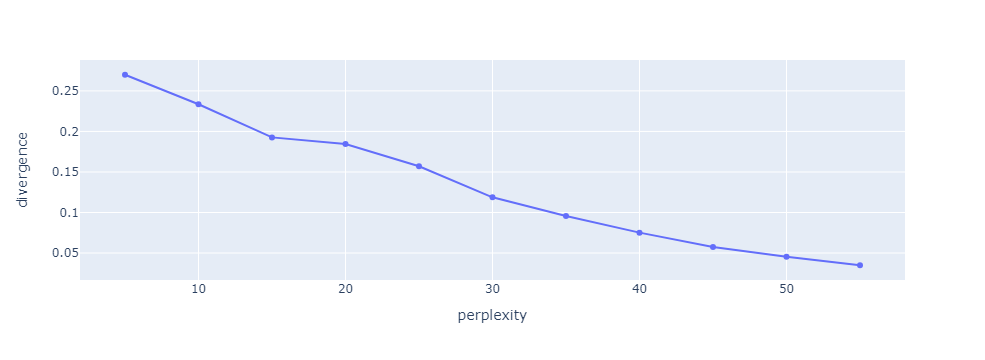

In [27]:
# perplexity
import numpy as np

perplexity = np.arange(5, 60, 5)
divergence = []

for i in perplexity:
    model = TSNE(n_components=2, init="pca", perplexity=i)
    reduced = model.fit_transform(X_train)
    divergence.append(model.kl_divergence_)
    
fig = px.line(x=perplexity, y=divergence)
fig.update_traces(mode='markers+lines')
fig.update_layout(xaxis_title = "perplexity", yaxis_title = "divergence")

fig.show()

In [23]:
tsne = TSNE(n_components=2, perplexity=50, random_state=20)
X_train_tsne = tsne.fit_transform(X_train)

tsne.kl_divergence_

0.045542579144239426

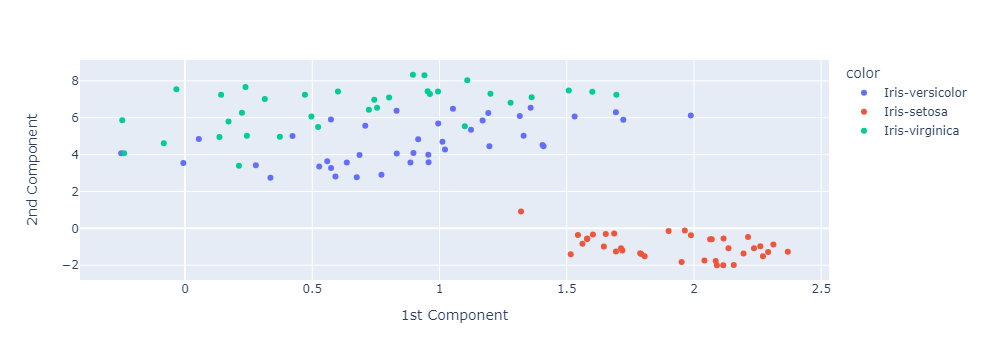

In [24]:
fig  = px.scatter(x = X_train_tsne[:, 0], y = X_train_tsne[:, 1], color=y_train)

fig.update_layout(
    xaxis_title = "1st Component",
    yaxis_title = "2nd Component",
)
fig.show()